<a href="https://colab.research.google.com/github/ratnamukti/deco6500_descriptiveanalysis/blob/main/surveyanalysisone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Merged EN only.csv to Merged EN only (1).csv
Merged EN only (1).csv
language_group
Other      23
English    20
Name: count, dtype: int64
Education
Bachelor's degree       32
Postgraduate             6
Graduate degree          3
High School              1
High school graduate     1
Name: count, dtype: int64
pLang_standardised
CN    36
ID     4
EN     1
KR     1
VN     1
Name: count, dtype: int64
Index(['CN', 'EN', 'ID', 'KR', 'VN'], dtype='object')
languages_list
EN    43
CN     4
KR     2
CT     2
FR     2
ES     1
JP     1
Name: count, dtype: int64


<ipython-input-3-25b2020c555a>:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['pLang_standardised'].replace({'bahasa indonesia': 'ID',


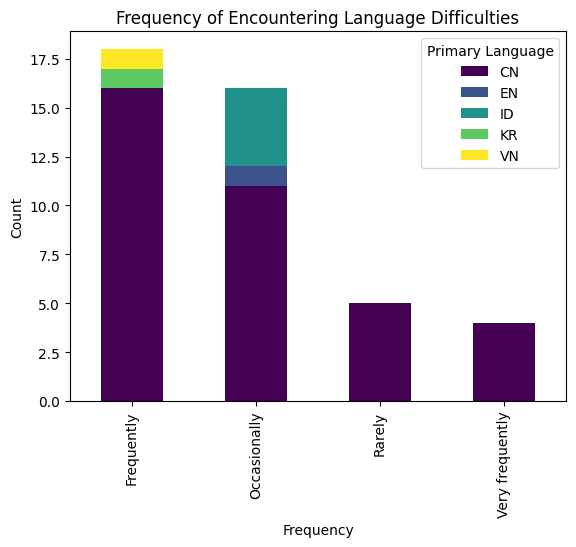

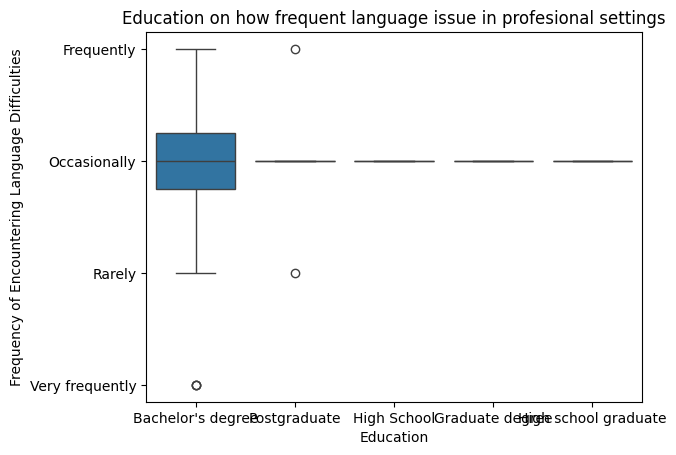

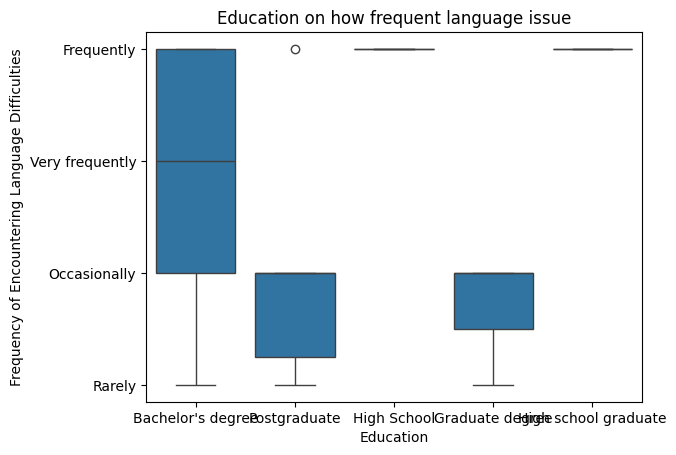

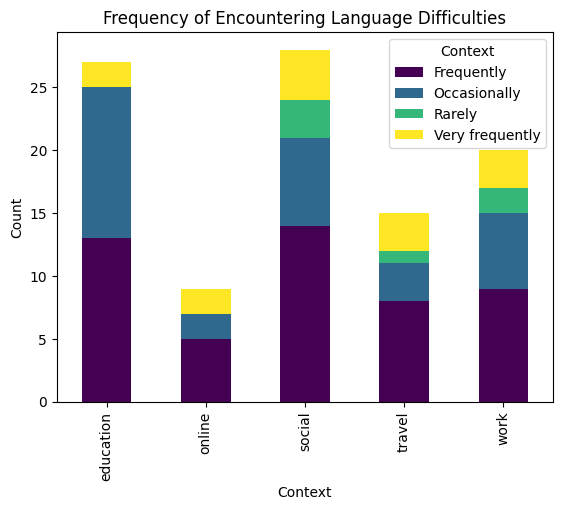

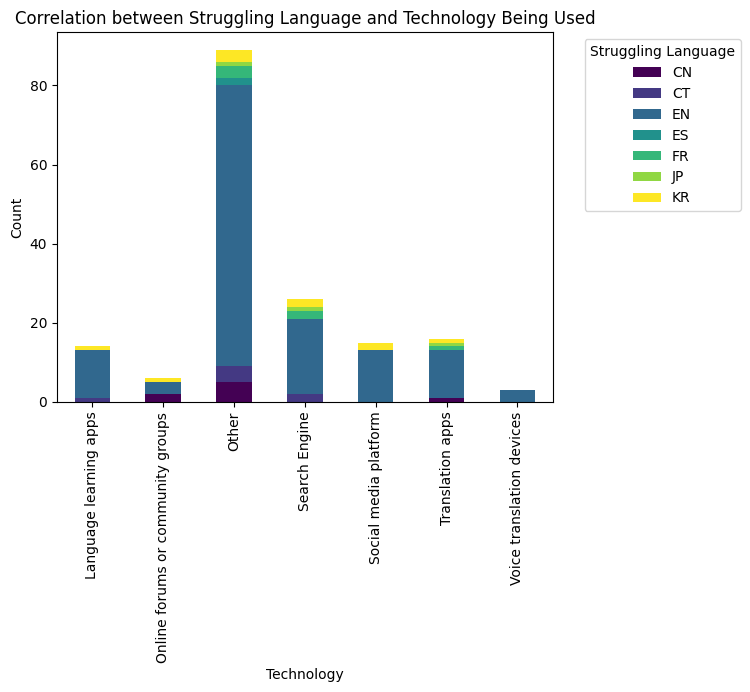

technology_clean                         Language learning apps  \
activities_clean                                                  
Asking for direction                                          3   
Commuting to work/school/malls, etc.                          2   
Conversing with friends or team members                       8   
Doing the assignments                                         8   
Online communication                                          3   
Ordering food (in-person or online)                           4   
Other                                                        13   
Reading restaurant menu                                       5   
Traveling for holidays                                        5   
Understanding the lecture                                     8   

technology_clean                         Online forums or community groups  \
activities_clean                                                             
Asking for direction                   

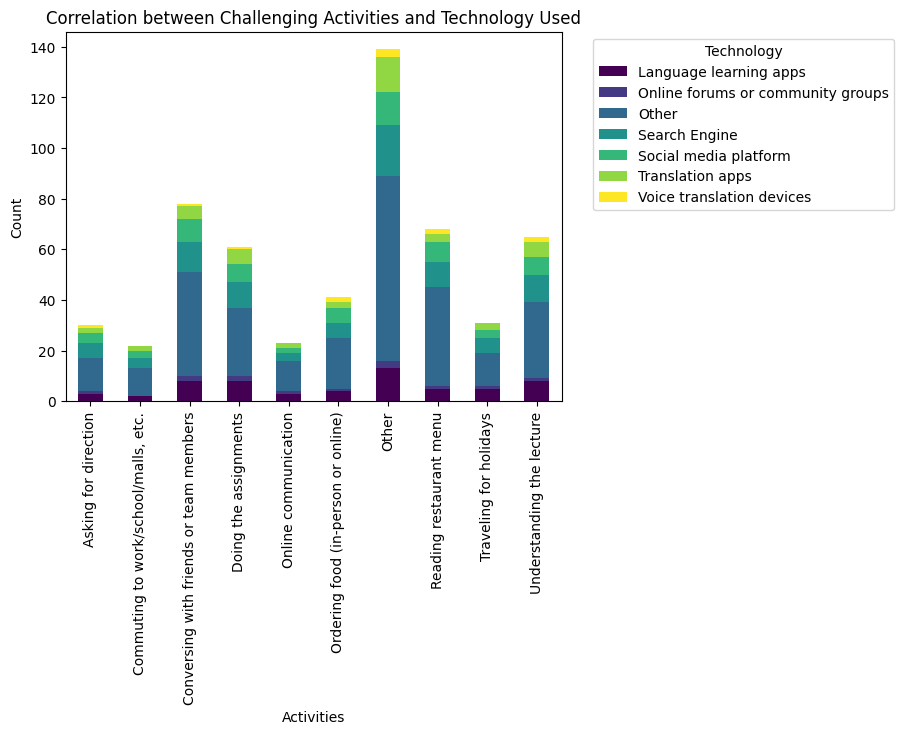

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal, mannwhitneyu, chi2_contingency

from google.colab import files
uploaded = files.upload()


def categorize_string(value):
    if value == 'English (United States)':
        return 'English'
    elif value == '中文（简体）':
        return 'Chinese'
    else:
        return 'Other'


print(list(uploaded.keys())[0])
df = pd.read_csv(list(uploaded.keys())[0], sep=';')
# Filter rows where the 'Struggling' column contains 'English'
df = df[df['Struggling'].str.contains('English', case=False, na=False)]
df.head()

# Delete the row of an incomplete data
df = df.dropna(subset=['How frequent do you encounter issues related to language difficulties?', 'How frequently have language barriers influenced your decisions in social or professional settings?'])
df.isnull().sum()

# Data Count Language
df['language_group'] = df['Language'].apply(categorize_string)
print(df['language_group'].value_counts())

# Data Count Education
# Count the occurrences of each value in the 'Education' column
education_counts = df['Education'].value_counts()
# Display the count of each education level
print(education_counts)

# Standardising the primary language input into language code
df['pLang_standardised'] = df['What is your primary language?'].str.strip().str.lower()
df['pLang_standardised'].replace({'bahasa indonesia': 'ID',
                                   'indonesia': 'ID',
                                   'indonesian': 'ID',
                                   'malayalam' : 'MY',
                                   'malaysian' : 'MY',
                                   'malay' : 'MY',
                                   'mandarin': 'CN',
                                   'chinese' : 'CN',
                                   'english': 'EN',
                                   'korean': 'KR',
                                   'japanese': 'JP',
                                   'chinese/japanese': 'JP',
                                   'french': 'FR',
                                   'german': 'DE',
                                   'spanish': 'ES',
                                   'hindi' : 'IN',
                                   'english/hindi': 'IN',
                                   'russian': 'RU',
                                   'portuguese': 'PT',
                                   'vietnamese': 'VN'}, inplace=True)
df['pLang_standardised'].value_counts()
df['pLang_standardised'] = df['pLang_standardised'].astype('category')
# count the number of occurrence of ecach primary language
print(df['pLang_standardised'].value_counts())
print(df['pLang_standardised'].cat.categories)

# Extract the column with languages
languages_column = df['Struggling']

# Function to split and clean the languages
def split_and_clean(languages):
    if pd.isna(languages):
        return []
    # Split by comma or 'and', strip spaces, and return a list
    result = []
    if 'mandarin' in languages.lower():
        result.append('CN')
    if 'chinese' in languages.lower():
        result.append('CN')
    if 'chinese' in languages.lower():
        result.append('CN')
    if 'cantonese' in languages.lower():
        result.append('CT')
    if 'english' in languages.lower():
        result.append('EN')
    if 'korean' in languages.lower():
        result.append('KR')
    if 'french' in languages.lower():
        result.append('FR')
    if 'german' in languages.lower():
        result.append('DE')
    if 'spanish' in languages.lower():
        result.append('ES')
    if 'japanese' in languages.lower():
        result.append('JP')
    if 'portuguese' in languages.lower():
        result.append('PT')
    if 'russian' in languages.lower():
        result.append('RU')
    if 'vietnamese' in languages.lower():
        result.append('VN')
    if len(result) == 0:
        result.append('Other')

    return result

# Apply the function to the column
df['languages_list'] = languages_column.apply(split_and_clean)

# Explode the lists into separate rows
exploded_languages = df.explode('languages_list')

# Count the occurrences of each language
language_counts = exploded_languages['languages_list'].value_counts()

# Display the count of each language
print(language_counts)


context_column = df['In which of the following contexts have you encountered language barriers? (Select all that apply)']

# Function to split and clean the languages
def split_and_clean_context(context):
    if pd.isna(context):
        return []
    # Split by comma or 'and', strip spaces, and return a list
    result = []
    if 'educational' in context.lower():
        result.append('education')
    if 'social' in context.lower():
        result.append('social')
    if 'traveling' in context.lower():
        result.append('travel')
    if 'work' in context.lower():
        result.append('work')
    if 'online' in context.lower():
        result.append('online')
    if len(result) == 0:
        result.append('Other')

    return result

# Apply the function to the column
df['context_clean'] = context_column.apply(split_and_clean_context)
df_context_exploded = df.explode('context_clean')

# Create a cross-tabulation of satisfaction by experience level
#sns.countplot(x='How frequent do you encounter issues related to language difficulties?', data=df)
frequency_pLang_crosstab = pd.crosstab(df['How frequent do you encounter issues related to language difficulties?'], df['pLang_standardised'])

# Plot the stacked bar chart
frequency_pLang_crosstab.plot(kind='bar', stacked=True, colormap='viridis')

plt.xlabel('Frequency')
plt.ylabel('Count')
plt.title('Frequency of Encountering Language Difficulties')
plt.legend(title='Primary Language')
plt.show()


sns.boxplot(x='Education', y='How frequently have language barriers influenced your decisions in social or professional settings?', data=df)
plt.title('Education on how frequent language issue in profesional settings')
plt.xlabel('Education')
plt.ylabel('Frequency of Encountering Language Difficulties')
plt.show()

sns.boxplot(x='Education', y='How frequent do you encounter issues related to language difficulties?', data=df)
plt.title('Education on how frequent language issue')
plt.xlabel('Education')
plt.ylabel('Frequency of Encountering Language Difficulties')
plt.show()

frequency_ctx_crosstab = pd.crosstab( df_context_exploded['context_clean'], df['How frequent do you encounter issues related to language difficulties?'].reindex(df_context_exploded.index))

# Plot the stacked bar chart
frequency_ctx_crosstab.plot(kind='bar', stacked=True, colormap='viridis')

plt.xlabel('Context')
plt.ylabel('Count')
plt.title('Frequency of Encountering Language Difficulties')
plt.legend(title='Context')
plt.show()


#Q3-@9 correlation
# Extract the column with languages (Q3)
languages_column = df['Struggling']

# Use your original split_and_clean function to process the 'Struggling' language column (Q3)
df['struggling_standardised'] = languages_column.apply(split_and_clean)

# Function to clean and categorize the technology used (Q9)
def split_and_clean_technology(technology):
    if pd.isna(technology):
        return []
    # Exact matching of strings, split by semicolon, and return a list
    technologies = technology.split(';')

    result = []
    for tech in technologies:
        tech = tech.strip()
        if 'Translation apps (e.g. Google Translate, deep)' in tech:
            result.append('Translation apps')
        elif 'Voice translation devices (e.g., Pocketalk, Travis Touch)' in tech:
            result.append('Voice translation devices')
        elif 'Social media platform' in tech:
            result.append('Social media platform')
        elif 'Search Engine (e.g. Google search)' in tech:
            result.append('Search Engine')
        elif 'Online forums or community groups (e.g., Reddit, TripAdvisor forums)' in tech:
            result.append('Online forums or community groups')
        elif 'Language learning apps' in tech:
            result.append('Language learning apps')
        else:
            result.append('Other')

    return result

# Apply the function to clean the technology column (Q9)
df['technology_clean'] = df['What types of technology do you use to overcome language barriers? (Select all that apply)'].apply(split_and_clean_technology)

# Explode the lists into separate rows for both 'struggling_standardised' and 'technology_clean'
df_exploded = df.explode('struggling_standardised')
df_exploded = df_exploded.explode('technology_clean')

# Create a cross-tabulation of the struggling language by technology used
technology_struggling_crosstab = pd.crosstab(df_exploded['technology_clean'], df_exploded['struggling_standardised'])

# Plot the stacked bar chart
technology_struggling_crosstab.plot(kind='bar', stacked=True, colormap='viridis')

plt.xlabel('Technology')
plt.ylabel('Count')
plt.title('Correlation between Struggling Language and Technology Being Used')
plt.legend(title='Struggling Language', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

#Q6 and Q9 correlation and chi square test

# Updated function to split and clean the activities data (Q6)
def split_and_clean_activities(activity):
    if pd.isna(activity):
        return []
    # Exact matching of strings, split by semicolon, and return a list
    activities = activity.split(';')

    result = []
    for act in activities:
        act = act.strip()  # Exact case-sensitive matching
        if 'Conversing with friends or team members' in act:
            result.append('Conversing with friends or team members')
        elif 'Reading restaurant menu' in act:
            result.append('Reading restaurant menu')
        elif 'Ordering food (in-person or online)' in act:
            result.append('Ordering food (in-person or online)')
        elif 'Asking for direction' in act:
            result.append('Asking for direction')
        elif 'Understanding the lecture' in act:
            result.append('Understanding the lecture')
        elif 'Doing the assignments' in act:
            result.append('Doing the assignments')
        elif 'Online communication' in act:
            result.append('Online communication')
        elif 'Traveling for holidays' in act:
            result.append('Traveling for holidays')
        elif 'Commuting to work/school/malls, etc.' in act:
            result.append('Commuting to work/school/malls, etc.')
        else:
            result.append('Other')

    return result

# Apply the function to clean the activities column (Q6)
df['activities_clean'] = df['What kind of activities that you think are challenging the most in term of the language barriers?'].apply(split_and_clean_activities)

# Reuse the existing function to clean the technology column (Q9)
df['technology_clean'] = df['What types of technology do you use to overcome language barriers? (Select all that apply)'].apply(split_and_clean_technology)

# Explode the lists into separate rows for both 'activities_clean' and 'technology_clean'
df_exploded = df.explode('activities_clean')
df_exploded = df_exploded.explode('technology_clean')

# Create a cross-tabulation between Q6 (activities) and Q9 (technology)
activities_technology_crosstab = pd.crosstab(df_exploded['activities_clean'], df_exploded['technology_clean'])

# Display the cross-tabulation
print(activities_technology_crosstab)

# Perform a Chi-Square test
chi2, p, dof, expected = chi2_contingency(activities_technology_crosstab)

# Display the Chi-Square test results
print("\nChi-Square Test Results")
print(f"Chi-Square Statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies:")
print(expected)

# Plot the cross-tabulation using a stacked bar chart
activities_technology_crosstab.plot(kind='bar', stacked=True, colormap='viridis')

plt.xlabel('Activities')
plt.ylabel('Count')
plt.title('Correlation between Challenging Activities and Technology Used')
plt.legend(title='Technology', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()



# technology_column = df['What types of technology do you use to overcome language barriers? (Select all that apply)']

# # Function to split and clean the languages
# def split_and_clean_technology(technology):
#     if pd.isna(technology):
#         return []
#     # Split by comma or 'and', strip spaces, and return a list
#     result = []
#     if 'Translation apps (e.g. Google Translate, deep)' in technology.lower():
#         result.append('translation apps')
#     if 'Voice translation devices (e.g., Pocketalk, Travis Touch)' in technology.lower():
#         result.append('voice translation device')
#     if 'Social media platform' in technology.lower():
#         result.append('social media platform')
#     if 'Search Engine (e.g. Google search)' in technology.lower():
#         result.append('search engine')
#     if 'Online forums or community groups (e.g., Reddit, TripAdvisor forums)' in technology.lower():
#         result.append('online forums or community groups')
#     if 'Language learning apps' in technology.lower():
#         result.append('language learning apps')
#     if len(result) == 0:
#         result.append('Other')

#     return result

# # Apply the function to the column
# df['technology_clean'] = technology_column.apply(split_and_clean_technology)
# df_technology_exploded = df.explode('technology_clean')

# technology_struggling_crosstab = pd.crosstab(df_technology_exploded['technology_clean'], exploded_languages['languages_list'])

# # Plot the stacked bar chart
# technology_struggling_crosstab.plot(kind='bar', stacked=True, colormap='viridis')

# plt.xlabel('Technology')
# plt.ylabel('Count')
# plt.title('Correlation between struggling language and technology being used')
# plt.legend(title='Technology')
# plt.show()

